# **BOOTCAMP DATA SCIENCE ALURA - SEMANA 03**

## **ANÁLISE PeNSE 2015 - AMOSTRA 2**

### **AULA 01 - EDUCAÇÃO, SAÚDE E TIPOS DE DADOS**

In [1]:
import pandas as pd
#importando biblioteca para ler arquivos zipados
from zipfile import ZipFile
caminho = '/content/drive/MyDrive/bootcamp_alura/PeNSE_2015_AMOSTRA2.zip'

In [2]:
#se temos apenas um arquivo do tipo zip, o pandas consegue ler, 
#no entanto esta pasta possui mais do que um arquivo
#abrindo o arquivo
zip = ZipFile(caminho)


In [3]:
#buscando informações dos arquivos zipados
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [4]:
#buscando apenas pelos nomes
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [5]:
#passando o arquivo que eu quero para uma variável descritiva
caminho_na_pasta_zipada = zip.namelist()[1]

In [6]:
#lendo o arquivo
dados = pd.read_csv(zip.open(caminho_na_pasta_zipada), sep=';', thousands = ".", decimal=",")

In [7]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


**Desafio:** Descompactar a pasta zipada usando outro método (Linux - Bash)

In [8]:
!ls drive

MyDrive


In [9]:
#descompactando os dados com bash
#!unzip PeNSE_2015_AMOSTRA2.zip

In [10]:
#visualização colunas
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [11]:
#informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [12]:
#dados numéricos do tipo float
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### **AULA 02 - DADOS QUALITATIVOS E TABELAS DE FREQUENCIA**

In [13]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [14]:
#dados de gênero
dados['VB01001'].value_counts(normalize=True)

1    0.500544
2    0.499456
Name: VB01001, dtype: float64

In [15]:
#dados de satisfação com o corpo
frequencia = dados['VB11007'].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [16]:
percentual = dados['VB11007'].value_counts(normalize=True)*100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [17]:
respostas = {1: 'Muito Satisfeito', 
             2: 'Satisfeito',
             3: 'Indiferente',
             4: 'Insatisfeito',
             5: 'Muito Insatisfeito',
             99: 'Não Informado'}
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual})
dist_freq.rename(index = respostas, inplace=True)
dist_freq.rename_axis('Sentimento em relação ao seu corpo', axis=1, inplace=True)
dist_freq

Sentimento em relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,41.797536
Muito Satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito,714,4.312636
Não Informado,181,1.093259


### **AULA 03 - DADOS CONTÍNUOS E TABELAS DE FREQUENCIA**

In [18]:
#criando uma coluna de IMC
dados['IMC'] = dados['VB17003']/(dados['VB17004']/100)**2

In [19]:
dados['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [20]:
classes = [0,18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

In [21]:
#criando as classificações usando o pd.cut
dados['CLASSE_IMC'] = pd.cut(x= dados['IMC'], bins = classes, labels = labels, include_lowest=True)
dados[['IMC', 'CLASSE_IMC']].sample(15)

,IMC,CLASSE_IMC
9250,22.081612,normal
7393,15.262488,abaixo
11018,19.706889,normal
1977,31.208964,obesidade
13319,19.480315,normal
3397,21.795458,normal
2039,20.956607,normal
4745,16.292591,abaixo
6031,23.945162,normal
12191,23.965142,normal


In [22]:
frequencia = dados['CLASSE_IMC'].value_counts()
percentual = dados['CLASSE_IMC'].value_counts(normalize=True)*100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual})
dist_freq

,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


In [23]:
#Criando a função que gera a tabela de frequencia
def cria_tabela_freq(series):
  """
  Cria uma tabela de frequencia com as classes, a frequencia e o percentual
  retorna um DF.

  series = Uma Series do Pandas
  """
  frequencia = series.value_counts()
  percentual = series.value_counts(normalize=True)
  dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual})
  return dist_freq

In [24]:
#vendo a altura mínima
dados['VB17004'].min()

124.1

In [25]:
#vendo a altura máxima
dados['VB17004'].max()

195.3

### Regra de Sturges para definir em quantas classes eu devo dividir uma variável:

##$k = 1 + ((10/3)*log_{10}(tamanho da amostra))$

In [26]:
import numpy as np
tamanho_amostra = len(dados)

k = int(1+ ((10/3)*np.log10(tamanho_amostra)))


In [27]:
#criando classes para a altura usando o K
dados['CLASSE_ALTURA'] = pd.cut(x= dados['VB17004'], bins = k, include_lowest=True)

In [28]:
cria_tabela_freq(dados['CLASSE_ALTURA'])

,Frequência,Percentual
"(157.327, 162.073]",3110,0.187847
"(152.58, 157.327]",2734,0.165137
"(162.073, 166.82]",2550,0.154023
"(166.82, 171.567]",2063,0.124607
"(147.833, 152.58]",1782,0.107635
"(171.567, 176.313]",1416,0.085528
"(143.087, 147.833]",1012,0.061126
"(176.313, 181.06]",749,0.045240
"(138.34, 143.087]",484,0.029234
"(181.06, 185.807]",300,0.018120


In [29]:
def calcula_k_sturges(amostra):
  """
  Retorna a quantidade ideal de classes conforme o tamanho de uma amostra, usando a regra de Sturges
  amostra = quantidade de observações numa amostra
  retorna k = número inteiro representando a quantidade de classes ideal
  """
  k = int(1+ ((10/3)*np.log10(amostra)))
  return k


In [30]:
#proporção por gênero
frequencia_cruzada = pd.crosstab(index = dados['VB11007'], columns = dados['VB01001'], normalize="columns")*100
frequencia_cruzada.rename(index = respostas, inplace=True, columns={1:'Masculino', 2:'Feminino'})
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito Insatisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [31]:
#proporção por classe
frequencia_cruzada = pd.crosstab(index = dados['VB11007'], columns = dados['VB01001'], normalize="index")*100
frequencia_cruzada.rename(index = respostas, inplace=True, columns={1:'Masculino', 2:'Feminino'})
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito Insatisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


### **AULA 04 - HISTOGRAMAS E DISTRIBUIÇÕES**

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


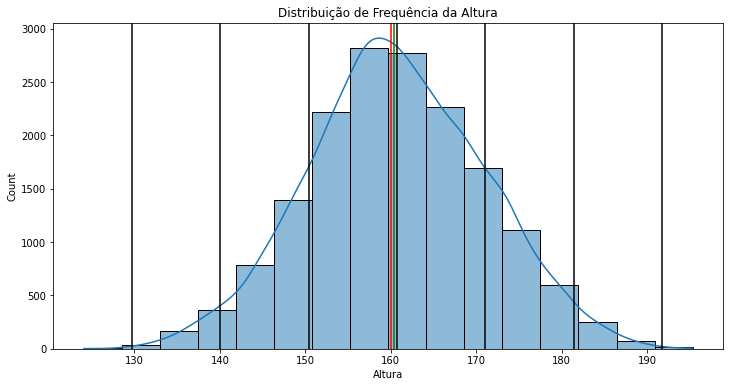

In [33]:
ax = sns.histplot(data= dados, x='VB17004', kde=True, bins='sturges')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura')
ax.set_xlabel('Altura')
plt.axvline(x=dados['VB17004'].mean(), color='k')
plt.axvline(x=dados['VB17004'].mode()[0], color='r')
plt.axvline(x=dados['VB17004'].median(), color='g')
plt.axvline(x=dados['VB17004'].mean() +dados['VB17004'].std() , color='k')
plt.axvline(x=dados['VB17004'].mean() -dados['VB17004'].std() , color='k')
plt.axvline(x=dados['VB17004'].mean() -2*(dados['VB17004'].std()) , color='k')
plt.axvline(x=dados['VB17004'].mean() +2*(dados['VB17004'].std()) , color='k')
plt.axvline(x=dados['VB17004'].mean() -3*(dados['VB17004'].std()) , color='k')
plt.axvline(x=dados['VB17004'].mean() +3*(dados['VB17004'].std()) , color='k');

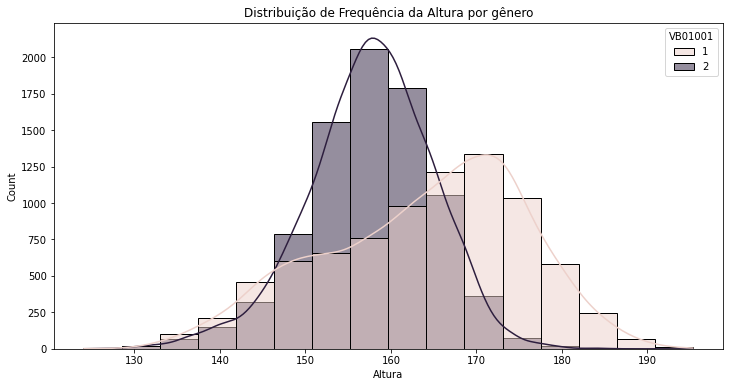

In [34]:
ax = sns.histplot(data= dados, x='VB17004', kde=True, bins='sturges', hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura por gênero')
ax.set_xlabel('Altura');

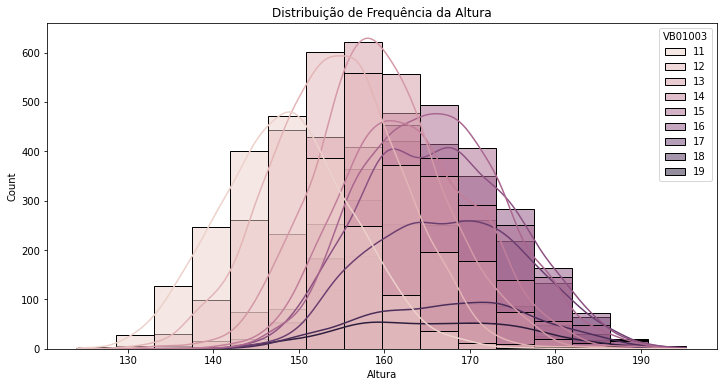

In [35]:
ax = sns.histplot(data= dados, x='VB17004', kde=True, bins='sturges', hue='VB01003')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura')
ax.set_xlabel('Altura');

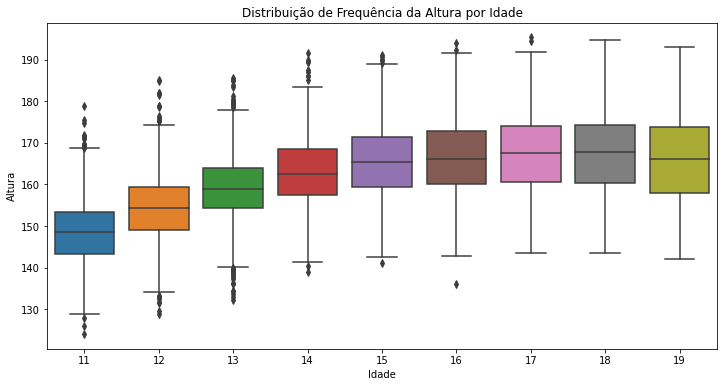

In [36]:
ax = sns.boxplot(data= dados, y='VB17004', x='VB01003')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura por Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura');

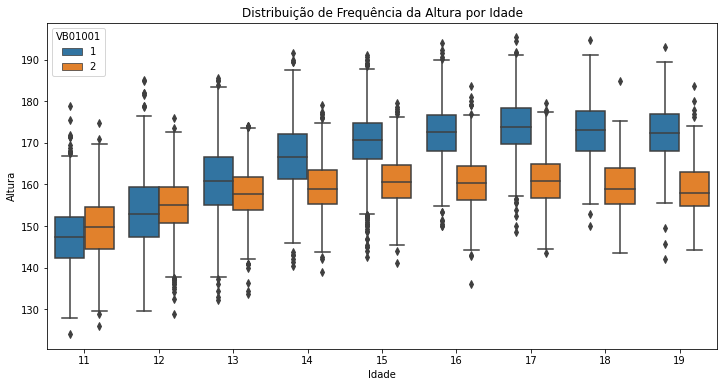

In [37]:
ax = sns.boxplot(data= dados, y='VB17004', x='VB01003', hue='VB01001')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência da Altura por Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura');

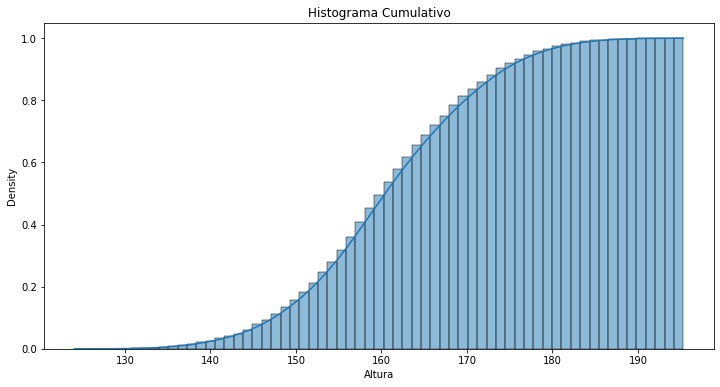

In [38]:
ax = sns.histplot(data= dados, 
                  x='VB17004', 
                  kde=True, 
                  cumulative=True,
                  stat='density')
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma Cumulativo')
ax.set_xlabel('Altura');


### **AULA 05 - MEDIDA DE CENTRALIDADE E DISPERSÃO**

In [39]:
#calculando a média por grupo (gênero)
dados.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [40]:
#calculando a moda

In [41]:
dados['VB17004'].mode()

0    160.0
dtype: float64

In [42]:
#calculando a média por grupos (gênero/idade)
dados.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [43]:
#calculando dispersão na mão
media_altura = dados['VB17004'].mean()
dados['MEDIA_ALTURA'] = media_altura

In [44]:
dados[['VB17004', 'MEDIA_ALTURA']]

,VB17004,MEDIA_ALTURA
0,157.0,160.713113
1,152.0,160.713113
2,161.4,160.713113
3,172.5,160.713113
4,167.5,160.713113
...,...,...
16551,167.9,160.713113
16552,185.8,160.713113
16553,159.4,160.713113
16554,157.8,160.713113


In [45]:
#calcular a diferença entre a altura e a média
diferenca_das_medias = dados['VB17004'] - media_altura
dados['DIFERENCA_MEDIA'] = diferenca_das_medias

In [46]:
#visualizando as diferenças
dados[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA']]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA
0,157.0,160.713113,-3.713113
1,152.0,160.713113,-8.713113
2,161.4,160.713113,0.686887
3,172.5,160.713113,11.786887
4,167.5,160.713113,6.786887
...,...,...,...
16551,167.9,160.713113,7.186887
16552,185.8,160.713113,25.086887
16553,159.4,160.713113,-1.313113
16554,157.8,160.713113,-2.913113


In [47]:
DIFERENCA_QUADRADO = diferenca_das_medias**2
dados['DIFERENCA_QUADRADO'] = DIFERENCA_QUADRADO

In [48]:
#visualizando as diferenças
dados[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA', 'DIFERENCA_QUADRADO']]


,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [49]:
dados['DIFERENCA_QUADRADO'].mean()

106.9105945368652

In [50]:
variancia_amostral = ((1/(len(dados)-1) )*dados['DIFERENCA_QUADRADO'].sum())
variancia_amostral

106.91705244049119

In [51]:
dados['VB17004'].mean()

160.71311307078818

In [52]:
desvio_padrao = np.sqrt(variancia_amostral)

In [53]:
#O desvio padrão é expressado na mesma medida que a medida da amostra, (no caso da altura, centímetros)
desvio_padrao

10.340070233827776

In [54]:
dados['VB17004'].std()

10.3400702338278

### **AULA 06 - INTERVALO DE CONFIANÇA E TESTES**

In [68]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest

In [60]:
#Calculando o intervalo de confiança com o Z Test
zconfint(dados["VB17004"].to_list())

(160.5556082427712, 160.87061789880892)

In [59]:
#Calculando o intervalo de confiança usando o Tconfint
descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

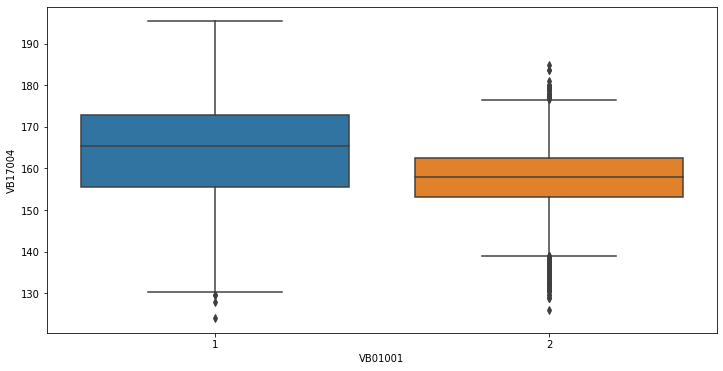

In [65]:
#boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x = "VB01001", y = "VB17004", data= dados);

In [70]:
distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

In [77]:
ztest(distribuicao_altura_m, distribuicao_altura_f) 

(41.16851708819389, 0.0)

In [78]:
#o p_value testa se as médias entre essas distribuições são iguais (Hipótese Nula)
statistics, p_value = ztest(distribuicao_altura_m, distribuicao_altura_f) 

In [79]:
p_value

0.0

In [76]:
#comparando distribuições iguais só para confirmar o conceito de p_value
ztest(distribuicao_altura_m, distribuicao_altura_m) 


(0.0, 1.0)

In [80]:
#fazendo o teste de normalidade para a distribuição de alturas do gênero masculino
from scipy.stats import normaltest
#rejeitamos a hipótese nula de que é uma distribuição normal
normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [82]:
#rejeitamos a hipótese nula de que é uma distribuição normal
normaltest(distribuicao_altura_f)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

In [84]:
_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)

print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [86]:
#Aplicando testes não paramétricos
from scipy.stats import ranksums
#verificando como hipótese nula se essas minhas duas distribuições são provenientes da mesma distribuição
ranksums(distribuicao_altura_m, distribuicao_altura_f)


RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

**Desafio 01**- Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

**Desafio 02** - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

**Desafio 03** - Classificar algumas perguntas como QualitativaXQuantitativa

**Desafio 04** - Gerar uma função para gerar as tabelas de frequência e fazer a análise de outras informações

**Desafio 05** - Criar uma tabela de frequencia para o peso

**Desafio 06** - Criar outros Crosstabs para análise e pesquisar sobre o parâmetro aggfunc e testar

**Desafio 07** - Calcular e plotar desvio padrão, média, moda e mediana no histograma da altura

**Desafio 08** - Calcular os outliers (IIQ)

**Desafio 09** - Fazer a descrição  de outras variáveis

**Desafio 10** - Média de altura por idade e gênero via crosstab

**Desafio 11** - O que é intervalo de confiança, nível confiança e o que é significância.

**Desafio 12** - plotar o intervalo de confiança no histograma das alturas

**Desafio 13** - Como será que é a distribuição do IMC para as pessoas que estão satisfeitas com o seu corpo? Ela é estatisticamente diferente da distribuição das pessoas que estão insatisfeitas com o seu corpo? Como eu consigo comprovar isso através do teste de hipótese? Fica aí o desafio para vocês brincarem, para vocês estudarem e explorarem ainda mais essa parte de testes.

**Desafio 14** - Realizar os testes de hipóteses de outras colunas

**Super Desafio 1** - Criar um dicionário para organizar/facilitar a busca da pergunta

**Super Desafio 2** - Usar NLP para buscar os termos relevantes (NLTK GESIM) nas perguntas


